# Analysis of Property Dataset

The assignment will focus on pre-processing data using the Pandas library, followed by the creation of plots using matplotlib and seaborn libraries. During this project, I developed skills in the following:
- Creating a copied data frame, changing column data types to perform logical conditions
- Grouping subsquent data in order to conduct aggregation functions on columns
- To then further plot these in a line chart
- Create a Series with a specific index, and using value_counts() to find the unique count and applying .sort_index() to order the series by the index.
- From the above series, creating a bar chart to display findings
- Create a function that takes in 2 paramters and retuns a scatter plot with the given properties contained within the function
- Create a seaborn .violinplot() to depict summary statistics and the density of each variable.

### Importing Libraries

Run the following cell to import packages and set plotting styling. 

**The plotting styling should not be changed**; doing so may result in KATE incorrectly evaluating your plots.

*Note: `matplotlib` does a lot of work in the background to "guess" what figure to plot on. This can have the effect of modifying figures you have created before in the notebook, which will cause your plots to be wrong on KATE. To ensure your plots are always created properly, call `plt.figure()` before each command that creates a new plot, this will ensure you plot on a new figure everytime.*

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') #prevents unnecessary mpl warnings about sns color palette

### About the Dataset

Please refer to the `data/data-dictionary.pdf` file outlining details about the dataset each field (properties and their characteristics)

### Importing the dataset

Use `.read_csv()` to get our dataset `data/assessments.csv` and assign to DataFrame `df`:

In [14]:
df = pd.read_csv('data/assessments.csv')

Running `df.head()` and `df.info()` will show us how the DataFrame is structured:

In [15]:
df.head()

,PROPERTYADDRESS,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SCHOOLDESC,NEIGHDESC,TAXDESC,OWNERDESC,CLASSDESC,USEDESC,...,CONDITION,CONDITIONDESC,CDUDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE
0,GRANT ST,PITTSBURGH,15219,1st Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,10 - Exempt,CORPORATION,GOVERNMENT,MUNICIPAL GOVERNMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,3.0,1.0,1.0,0.0,Central Heat with AC,0.0,0.0
2,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,4.0,1.0,1.0,0.0,Central Heat with AC,0.0,0.0
3,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,5.0,2.0,1.0,0.0,Central Heat with AC,NaN,NaN
4,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,3.0,1.0,1.0,0.0,Central Heat with AC,NaN,NaN


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROPERTYADDRESS     1650 non-null   object 
 1   PROPERTYCITY        1650 non-null   object 
 2   PROPERTYZIP         1650 non-null   int64  
 3   MUNIDESC            1650 non-null   object 
 4   SCHOOLDESC          1650 non-null   object 
 5   NEIGHDESC           1648 non-null   object 
 6   TAXDESC             1650 non-null   object 
 7   OWNERDESC           1650 non-null   object 
 8   CLASSDESC           1650 non-null   object 
 9   USEDESC             1650 non-null   object 
 10  LOTAREA             1650 non-null   int64  
 11  HOMESTEADFLAG       906 non-null    object 
 12  ABATEMENTFLAG       0 non-null      float64
 13  RECORDDATE          869 non-null    object 
 14  SALEDATE            1634 non-null   object 
 15  SALEPRICE           1625 non-null   float64
 16  SALEDE

### Charting residential properties with pandas

**Q1.** Create a DataFrame containing only properties from `df` with a `CLASSDESC` of `RESIDENTIAL`.
Store the answer in a variable called `res`

In [17]:
#add your code below
res = df[df['CLASSDESC'] == 'RESIDENTIAL']
res


,PROPERTYADDRESS,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SCHOOLDESC,NEIGHDESC,TAXDESC,OWNERDESC,CLASSDESC,USEDESC,...,CONDITION,CONDITIONDESC,CDUDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE
1,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,3.0,1.0,1.0,0.0,Central Heat with AC,0.0,0.0
2,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,4.0,1.0,1.0,0.0,Central Heat with AC,0.0,0.0
3,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,5.0,2.0,1.0,0.0,Central Heat with AC,NaN,NaN
4,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,3.0,1.0,1.0,0.0,Central Heat with AC,NaN,NaN
5,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,3.0,1.0,1.0,0.0,Central Heat with AC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,PHILLIPS LN,MC KEES ROCKS,15136,Robinson,Montour,93903,20 - Taxable,REGULAR,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,6.0,3.0,2.0,0.0,Central Heat with AC,1.0,2.0
1645,REITER RD,PITTSBURGH,15235,Penn Hills,Penn Hills Twp,PENN HILLS TOWNSHIP,20 - Taxable,REGULAR-ETAL,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,5.0,3.0,1.0,1.0,Central Heat with AC,1.0,3.0
1646,SILVER PINES DR,GIBSONIA,15044,Pine,Pine-Richland,93501,20 - Taxable,REGULAR,RESIDENTIAL,SINGLE FAMILY,...,2.0,GOOD,GOOD,14.0,6.0,6.0,1.0,Central Heat with AC,NaN,NaN
1647,HIGHVIEW DR,PITTSBURGH,15241,Upper St. Clair,Upper St Clair,UPPER ST. CLAIR TOWNSHIP,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,8.0,4.0,2.0,1.0,Central Heat with AC,1.0,2.0


**Q2.** Create a DataFrame containing only properties from `res` with `BEDROOMS` greater than 0 and less than 7.

- Use the `.copy()` method so that you have a distinct DataFrame in memory
- Use the `.notnull()` method to mask out the rows in `BEDROOMS` which are null
- Use the `.astype()` method to change the data type of the `BEDROOMS` column to `int`
- Filter the new DataFrame to only contain rows where `BEDROOMS` is greater than `0` and less than `7`

Call the new dataframe `res_16`

In [18]:
#create copied df
res_16 = res.copy()
#get bedrooms with not null values
bed_missing_removed = res_16.loc[res_16['BEDROOMS'].notnull()]
#change data type of bedrooms column to int
bed_missing_removed['BEDROOMS'] = bed_missing_removed['BEDROOMS'].astype(int)
# Filter the new DataFrame to only contain rows where BEDROOMS is greater than 0 and less than 7
bed_missing_removed = bed_missing_removed[(bed_missing_removed['BEDROOMS'] > 0) & (bed_missing_removed['BEDROOMS'] < 7)]

#assign bed_missing_removed to res_16
res_16 = bed_missing_removed

res_16





/home/kate/.local/.kloud/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PROPERTYADDRESS,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SCHOOLDESC,NEIGHDESC,TAXDESC,OWNERDESC,CLASSDESC,USEDESC,...,CONDITION,CONDITIONDESC,CDUDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE
1,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,3.0,1,1.0,0.0,Central Heat with AC,0.0,0.0
2,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,4.0,1,1.0,0.0,Central Heat with AC,0.0,0.0
3,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,5.0,2,1.0,0.0,Central Heat with AC,NaN,NaN
4,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,3.0,1,1.0,0.0,Central Heat with AC,NaN,NaN
5,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,3.0,1,1.0,0.0,Central Heat with AC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,PHILLIPS LN,MC KEES ROCKS,15136,Robinson,Montour,93903,20 - Taxable,REGULAR,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,6.0,3,2.0,0.0,Central Heat with AC,1.0,2.0
1645,REITER RD,PITTSBURGH,15235,Penn Hills,Penn Hills Twp,PENN HILLS TOWNSHIP,20 - Taxable,REGULAR-ETAL,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,5.0,3,1.0,1.0,Central Heat with AC,1.0,3.0
1646,SILVER PINES DR,GIBSONIA,15044,Pine,Pine-Richland,93501,20 - Taxable,REGULAR,RESIDENTIAL,SINGLE FAMILY,...,2.0,GOOD,GOOD,14.0,6,6.0,1.0,Central Heat with AC,NaN,NaN
1647,HIGHVIEW DR,PITTSBURGH,15241,Upper St. Clair,Upper St Clair,UPPER ST. CLAIR TOWNSHIP,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,8.0,4,2.0,1.0,Central Heat with AC,1.0,2.0


**Q3.** Use `.groupby()` on `res_16` to create a Series with an index of `BEDROOMS` and values of the `.mean()` of `FULLBATHS` for each number of `BEDROOMS`. Assign this series to a new variable called `bed_bath`:

```python
DataFrame_Name.groupby(by=...)[column].mean() 
```

In [19]:
#add your code below
bed_bath = res_16.groupby('BEDROOMS')['FULLBATHS'].mean()

bed_bath

BEDROOMS
1    1.030303
2    1.173469
3    1.354132
4    2.236301
5    2.925926
6    3.552632
Name: FULLBATHS, dtype: float64

**Q4.** Use the `.plot()` method on `bed_bath` to create a plot of `kind='line'`.

```python
Series_Name.plot(kind=...)
```
- This should result in a plot of `BEDROOMS` on the **x-axis** with the average number of `FULLBATHS` on the **y-axis**
- Save your plot into a new variable `bb_line`



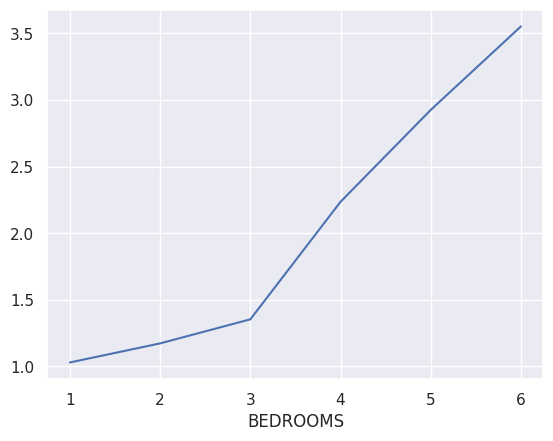

In [20]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

#add your code below
bb_line = bed_bath.plot(kind='line', x='BEDROOMS', y='FULLBATHS')



**Q5.** Using the `res_16` DataFrame, create a Series with an index of `BEDROOMS` and values of the `.value_counts()` of each number, using `.sort_index()` to order it by the index.
- Call the new variable `beds`

In [21]:
#add your code below
beds = res_16.set_index('BEDROOMS')

res_16['BEDROOMS'].value_counts().sort_index()
beds = res_16['BEDROOMS'].value_counts().sort_index()
beds

1     33
2    294
3    593
4    292
5     54
6     38
Name: BEDROOMS, dtype: int64

**Q6.** Use the `.plot()` method on `beds` to create a plot of `kind='bar'`, with variable `bar_title` as the `title`.
```python
DataFrame_Name.plot(kind=..., title=...)
```
- Save your plot into a variable called `beds_bar`

In [22]:
bar_title = 'Residential housing by number of bedrooms'

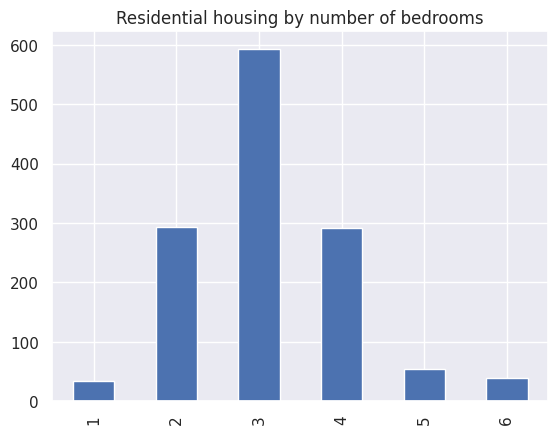

In [23]:
#We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

#add your code below
beds_bar = beds.plot(kind='bar', title=bar_title,)



**Q7.** Create a function called `zip_land` which takes two arguments: a DataFrame (with the same columns as `df`) and an integer (which it can be assumed will always be present in the `PROPERTYZIP` column of the DataFrame).

- This function will need to filter down the `df` argument to the rows where the `PROPERTYZIP` column is equal to the `zip_code` argument, before returning a `scatter` plot with the following properties:

    - `x=LOTAREA`
    - `y=FAIRMARKETLAND`
    - `xlim` and `ylim` both from `0` to double the `.mean()` of the respective column values
    - `alpha` = 0.4
    - `figsize` = (12, 10)

Note: make sure you return the plot. You should have in your code something like:
```python
def zip_land(df, zip_code):

    my_plot = [command to plot] 

    return my_plot

```

In [24]:
#add your code below to implement zip_land
def zip_land(df, zip_code):
        df_new = df[df['PROPERTYZIP'] == zip_code]
        lot = df_new['LOTAREA'].mean() * 2
        fair = df_new['FAIRMARKETLAND'].mean() * 2
        my_plot = df_new.plot(kind='scatter', x='LOTAREA', y='FAIRMARKETLAND', alpha=0.4, figsize=(12,10), ylim=(0,fair), xlim=(0,lot))
        return my_plot



Run the following code cell to check that your function returns a chart as expected:

<AxesSubplot:xlabel='LOTAREA', ylabel='FAIRMARKETLAND'>

<Figure size 640x480 with 0 Axes>

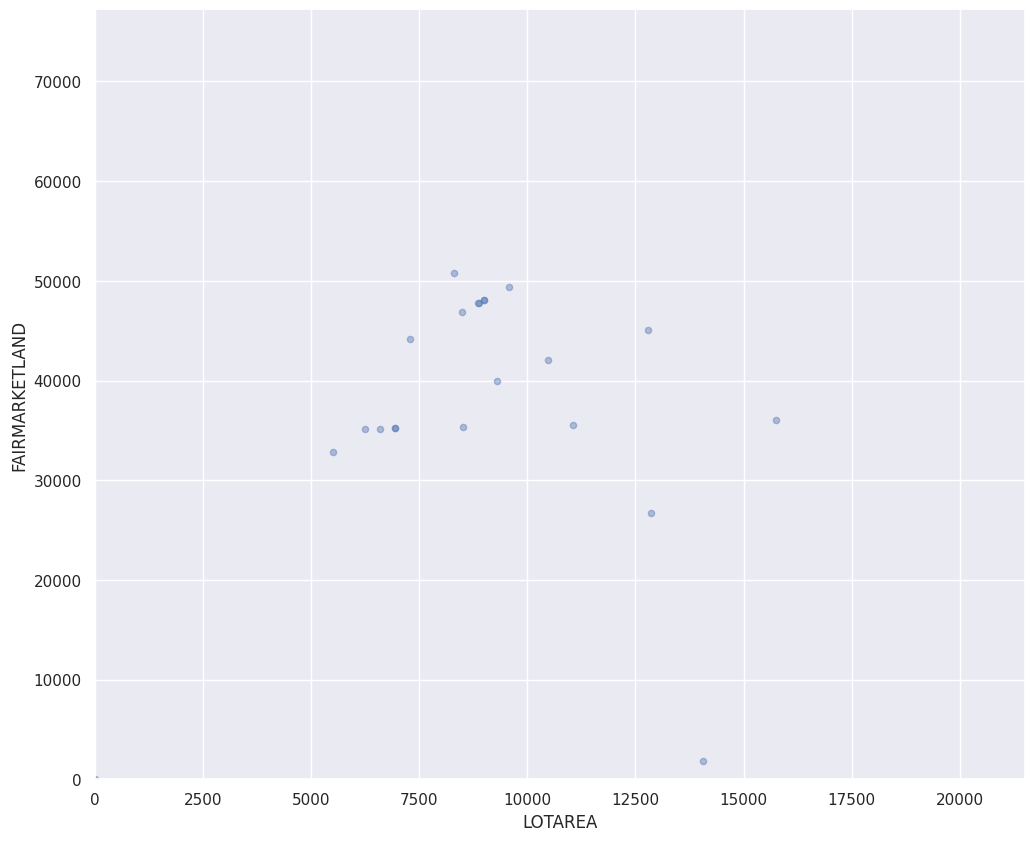

In [26]:
#We create a new figure to make other figures in the notebook don't get modified
plt.figure()
zip_chart = zip_land(df, 15236)
zip_chart

### Charting property values with seaborn

**Q8.** Create a DataFrame which contains only entries from `df` with a `SALEDESC` of `VALID SALE`.
- Use the `.copy()` method to ensure you have a distinct DataFrame in memory

Call the new dataframe `sales`

In [27]:
#add your code below
sales = df.copy()

sales = sales[sales['SALEDESC'] == 'VALID SALE']

sales
# sales['SALEDESC'].value_counts()



,PROPERTYADDRESS,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SCHOOLDESC,NEIGHDESC,TAXDESC,OWNERDESC,CLASSDESC,USEDESC,...,CONDITION,CONDITIONDESC,CDUDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE
21,BIGELOW BLVD,PITTSBURGH,15213,4th Ward - PITTSBURGH,City Of Pittsburgh,10401,20 - Taxable,REGULAR,RESIDENTIAL,SINGLE FAMILY,...,2.0,GOOD,GOOD,7.0,2.0,3.0,1.0,Central Heat with AC,1.0,0.0
22,BIGELOW BLVD,PITTSBURGH,15213,4th Ward - PITTSBURGH,City Of Pittsburgh,10401,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,SINGLE FAMILY,...,2.0,GOOD,GOOD,10.0,7.0,4.0,0.0,Central Heat,1.0,0.0
25,FORBES AVE,PITTSBURGH,15213,4th Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,20 - Taxable,CORPORATION,COMMERCIAL,RETL/OFF OVER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,BOUNDARY ST,PITTSBURGH,15213,4th Ward - PITTSBURGH,City Of Pittsburgh,10403,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,VACANT LAND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,S CRAIG ST,PITTSBURGH,15213,4th Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,20 - Taxable,CORPORATION,COMMERCIAL,SMALL DETACHED RET(UNDER 10000),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,PARK AVE,PITTSBURGH,15221,Braddock Hills,Woodland Hills,BRADDOCK HILLS,20 - Taxable,REGULAR,RESIDENTIAL,SINGLE FAMILY,...,4.0,FAIR,FAIR,3.0,1.0,1.0,0.0,Central Heat,0.0,0.0
1643,BIG ROCK RD,ALLISON PARK,15101,Hampton,Hampton Township,91402,20 - Taxable,REGULAR,RESIDENTIAL,TOWNHOUSE,...,3.0,AVERAGE,AVERAGE,5.0,2.0,2.0,1.0,Central Heat with AC,0.0,0.0
1644,PHILLIPS LN,MC KEES ROCKS,15136,Robinson,Montour,93903,20 - Taxable,REGULAR,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,6.0,3.0,2.0,0.0,Central Heat with AC,1.0,2.0
1645,REITER RD,PITTSBURGH,15235,Penn Hills,Penn Hills Twp,PENN HILLS TOWNSHIP,20 - Taxable,REGULAR-ETAL,RESIDENTIAL,SINGLE FAMILY,...,3.0,AVERAGE,AVERAGE,5.0,3.0,1.0,1.0,Central Heat with AC,1.0,3.0


**Q9.** Add a column to `sales` called `PITTSBURGH`, containing boolean values of `True` where `PROPERTYCITY` equals `PITTSBURGH` and `False` if not.

In [28]:
#add your code below


sales['PITTSBURGH'] = sales['PROPERTYCITY'] == 'PITTSBURGH'



**Q10.** Create a seaborn `.violinplot()` with the following properties:

`x` = `PITTSBURGH`  
`y` = `FAIRMARKETTOTAL`   
`data` = only entries from `sales` where `['BEDROOMS'] == 1`

*Put the `sns.type_of_plot(...)` statement after the `=` assignment sign; you will still see the resulting plot in the notebook, and KATE will be able to evaluate it.*

Call the new variable `pitts_violin`

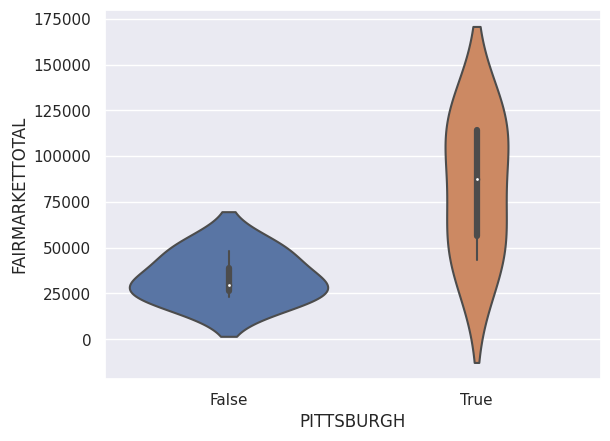

In [29]:
#We create a new figure to make other figures in the notebook don't get modified
plt.figure()

#add your code below
pitts_violin = sns.violinplot(data=sales[sales['BEDROOMS']==1], x='PITTSBURGH', y='FAIRMARKETTOTAL',)



**Q11.** Create a seaborn `.regplot()` with the following properties:

`x` = `SALEPRICE`    
`y` = `FAIRMARKETTOTAL`  
`data` = only entries from `sales` where `['GRADEDESC'] == 'EXCELLENT'`

Call the new variable `exc_reg`

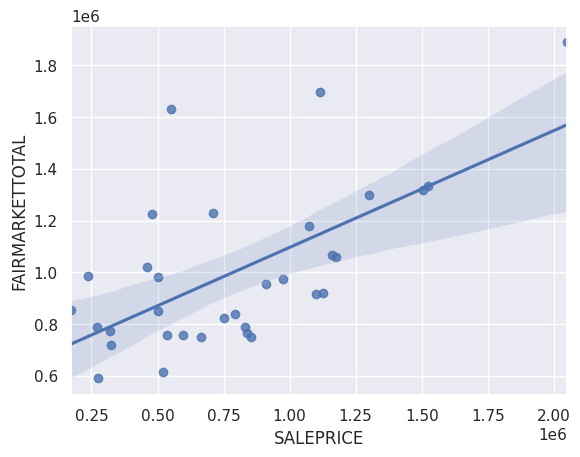

In [30]:
#We create a new figure to make other figures in the notebook don't get modified
plt.figure()

#add your code below
exc_reg = sns.regplot(data=sales[sales['GRADEDESC'] == 'EXCELLENT'], x='SALEPRICE', y='FAIRMARKETTOTAL')



**Q12.** Create a DataFrame called `bus` which contains only entries from `sales` where `CLASSDESC` `.isin(['COMMERCIAL', 'INDUSTRIAL', 'AGRICULTURAL'])`.

In [31]:
#add your code below
bus = sales[sales['CLASSDESC'].isin(['COMMERCIAL', 'INDUSTRIAL', 'AGRICULTURAL'])]


**Q13.** Create a DataFrame using the `.groupby()` method on the `bus` DataFrame with the following properties:

- Data grouped by `['CLASSDESC', 'PITTSBURGH']` where the values are of the `.mean()` of `FAIRMARKETTOTAL`
- Use `.reset_index()` so that a DataFrame is created
- Use `.sort_values(by='FAIRMARKETTOTAL')` to order it


Call the new dataframe `bus_value`

In [32]:
bus_value = bus.groupby(['CLASSDESC', 'PITTSBURGH'])[['FAIRMARKETTOTAL']].mean().reset_index().sort_values(by='FAIRMARKETTOTAL')
bus_value

,CLASSDESC,PITTSBURGH,FAIRMARKETTOTAL
0,COMMERCIAL,False,191475.0
2,INDUSTRIAL,False,362800.0
1,COMMERCIAL,True,674725.0


**Q14.** Create a seaborn `.barplot()` with the following properties:
- `x` = `CLASSDESC`
- `y` = `FAIRMARKETTOTAL`
- `hue` = `PITTSBURGH`
- `data` = `bus_value`

Call the new variable `bus_bar`

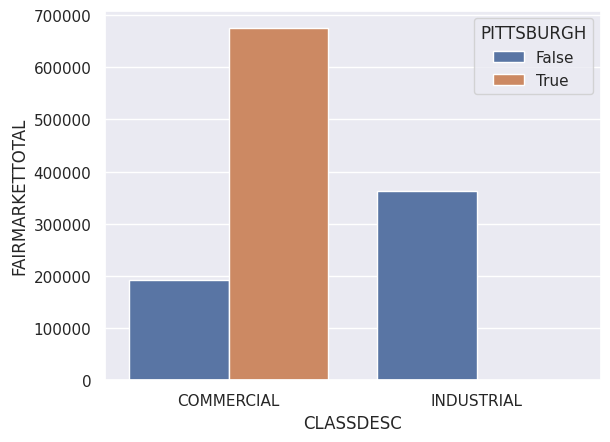

In [33]:
#We create a new figure to make other figures in the notebook don't get modified
plt.figure()

#add your code below
bus_bar = sns.barplot(data=bus_value, x='CLASSDESC', y='FAIRMARKETTOTAL', hue='PITTSBURGH')

